<a href="https://colab.research.google.com/github/alik220/Graph-analysis/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_1_%D0%9B%D0%B0%D0%B7%D0%B0%D1%80%D0%B5%D0%B2%D0%B0_%D0%90%D0%BB%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import networkx as nx 

In [ ]:
!gdown --id 16ddZo6j4W5R2l-2mUkMwhqCCSpvHqXWE

Downloading...
From: https://drive.google.com/uc?id=16ddZo6j4W5R2l-2mUkMwhqCCSpvHqXWE
To: /content/Wiki-Vote.txt
100% 1.09M/1.09M [00:00<00:00, 5.12MB/s]


### **1. Выведите число вершин, число ребер и плотность сети.**

In [ ]:
G=nx.read_edgelist('Wiki-Vote.txt') # создаем граф
print('Nodes:',G.number_of_nodes()) # число узлов
print('Edges:',G.number_of_edges()) # число вершин
print('Density:',nx.density(G)) # 

Nodes: 7115
Edges: 100762
Density: 0.003981420144693063


In [ ]:
# лист всех степеней вершин

degrees = [d for n, d in G.degree()]
print(np.mean(degrees))


In [ ]:
# плотность распределение степеней

a = plt.hist(degrees, bins = 100, log = True)
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)

In [ ]:
print(list(G['run'])) # выводим всех ближайших соседей, подграф

### **2. Постройте распределение коэффициента кластеризации, какие значения он преимущественно принимает? Сколько вершин имеют нулевую кластеризацию, сколько единичную?**

### Кластеризация

1. Транзитивность или глобальный коэффициент транзитивности (вся сеть)
$$
T=\frac{6N_t}{\sum_i k_i(k_i-1)},
$$

  $N_t$ - число треугольников,

  $k_i$ - степень вершин, $\sum_i k_i(k_i-1)/2$ описывает число всех троек в сети.


2. Коэффициент кластеризации $i$ вершины (для одной вершины):

$$
C=\frac{2N_t(i)}{k_i(k_i-1)},
$$

  $N_t$ - число треугольников с вершиной $i$.


In [ ]:
print(nx.transitivity(G)) # транзитивность

0.12547914899233995


In [ ]:
print(nx.average_clustering(G)) # средний коэффициент

print(nx.triangles(G)) # число треугольников

cluster = nx.clustering(G)

0.14089784589308738
{'30': 57, '1412': 20, '3352': 12875, '5254': 3594, '5543': 4931, '7478': 401, '3': 280, '28': 2309, '39': 368, '54': 259, '108': 8, '152': 345, '178': 471, '182': 805, '214': 961, '271': 1879, '286': 65, '300': 43, '348': 209, '349': 26, '371': 955, '567': 68, '581': 19, '584': 68, '586': 57, '590': 197, '604': 50, '611': 51, '8283': 4, '25': 748, '6': 3143, '8': 2294, '19': 482, '23': 661, '29': 1664, '33': 334, '35': 1899, '50': 317, '55': 948, '75': 420, '80': 863, '86': 2139, '94': 666, '127': 1127, '154': 527, '192': 153, '224': 102, '226': 158, '246': 41, '252': 178, '255': 975, '257': 108, '261': 150, '273': 64, '280': 599, '282': 873, '299': 1273, '302': 80, '306': 3004, '308': 2074, '310': 3197, '322': 181, '325': 353, '339': 520, '356': 306, '358': 12, '363': 26, '370': 155, '373': 42, '377': 40, '379': 46, '407': 3605, '415': 434, '422': 15, '428': 64, '439': 573, '488': 106, '514': 41, '545': 347, '549': 348, '560': 130, '592': 77, '600': 3706, '645': 7

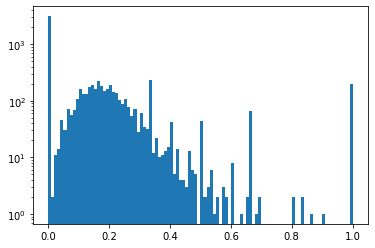

In [ ]:
b=plt.hist(cluster.values(), log=True, bins = 100)

In [ ]:
from collections import Counter

In [ ]:
res = Counter(cluster.values())
res.most_common(3)

[(0, 3140), (0.3333333333333333, 220), (1.0, 202)]

***Ответ***: Коэффициент кластеризации преимещуственно принимает значение 0 и 0,(3). Значение 0,(3) встрачается 220 раз, значение 0 — 3140 раз.

Значение 1 встречается 202 раза.

## **Основные структурные свойства, устойчивость сети**

### **1. Вычислите коэффициент корреляции Пирсона степени и коэффициента кластеризации вершин**

In [ ]:
# степень

gdict = dict(G.degree())

degrees2 = []
for word in gdict.keys():
    degrees2.append(gdict[word])

In [ ]:
# cluster — коэффициент кластеризации вершин

lst = []
for word in nx.clustering(G).keys():
    lst.append(cluster[word])
X = lst
Y = degrees2

In [ ]:
kP = np.corrcoef (X, Y) # коэффициент корреляции Пирсона между сетепенью и коэффициентом кластеризации
kP

array([[1.        , 0.04763996],
       [0.04763996, 1.        ]])

***Ответ***: коэффициент корреляции Пирсона между сетепенью и коэффициентом кластеризации вершин невелик, т.е. корреляция не наблюдается

### **3. Определите число компонет связности и постройте распределение размера компонент связности (удалите из массива максимальную компоненту для наглядности)**



In [ ]:
print(nx.is_connected(G))  # проверка на связность графа

False


In [ ]:
connect_comp = nx.connected_components(G) #возвращает узлы, входящие во все связнные компоненты

SCC = [len(c) for c in sorted(connect_comp, key = len, reverse = True)] # число компонет связности упорядочено по длине
len(SCC)

24

In [ ]:
LCG_nodes = max(nx.connected_components(G), key = len)
LCG = G.subgraph(LCG_nodes) # подграф максимальной компоненты. Берем все узлы мк, строим подграф

print (len(LCG)/len(G)) # сколько процентов занимает главная компонента

0.9931131412508785


In [ ]:
print(len(LCG)) # максимальная компонента, длина

7066


In [ ]:
SCC.remove(len(LCG))

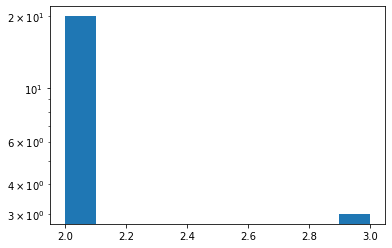

In [ ]:
c=plt.hist(SCC,log=True)

***Ответ***: количество компонент связности равно 24. Размер наибольшей компоненты 7066


### **3. Исследуйте локальную эффективность максимальной компоненты на устойчивость.**

### Эффективность

1) Общая эффективность:
$$
E(G)=\frac{1}{N(N-1)}\sum_{i\ne j}\frac{1}{d_{i,j}},
$$
$d_{i,j}$ - кратчайшее расстояние между вершинами $i$ и $j$;

2) Локальная

$$
E_{loc}(G,i)=\frac{1}{N}\sum_{i \in G}E(G_i),
$$
$G_i$ - подграф, построенный на ближайших соседях вершины $i$, сама вершина $i$ в подграф не входит.


In [ ]:
epsilon = 0.01 # сколько связей удаляется за шаг

n = int(epsilon * LCG.number_of_edges())  # number_of_edges - кол-во связей
LCH = LCG.copy()

tran=[]
tran.append(nx.transitivity(LCH))
for i in range(10):
  edges_removed = [list(LCH.edges)[k] for k in np.random.choice(LCH.number_of_edges(), n, replace = False)] # случайно удаляем 50 связей
  LCH.remove_edges_from(edges_removed)
  tran.append(nx.transitivity(LCH))

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(np.linspace(0,50 * epsilon, 51), trace, 'o--')
plt.xlabel('fraction of removed links')
plt.ylabel('local efficiency')

## **Распределение степеней и корреляция**

### **1. Для выбранной сети постройте распределение степеней, определите, подчиняется ли распределение степенному закону, оцените параметры распределения.**

In [ ]:
degrees = [d for n, d in G.degree()] # лист всех значений степеней

In [ ]:
h, x = np.histogram(degrees, bins=100, density=True) 

x_ = (x[:-1]+x[1:])/2 # координаты середины столбиков

Чтобы выявить степенное распределение вида
$
p(x)= C x^{-\gamma},
$
строят распределение в двойном логарифмическом масштабе. В такой шкале распределение можно аппроксимировать прямой, угол наклона которой показывает $\gamma$:
$$
\log p(x)=\log C- \gamma \log x
$$

Text(0, 0.5, '$\\rho(k)$')

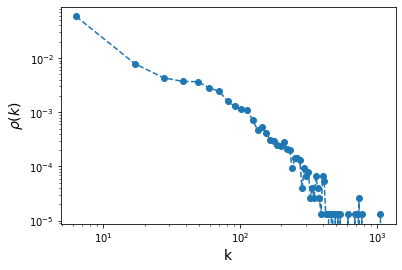

In [ ]:
plt.plot(x_,h,'o--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)

In [ ]:
z = np.polyfit(np.log(x_[np.nonzero(h)]), np.log(h[np.nonzero(h)]), 1) 
f= np.poly1d(z) # функция с найденными коэффициентами

Text(0, 0.5, '$\\rho(k)$')

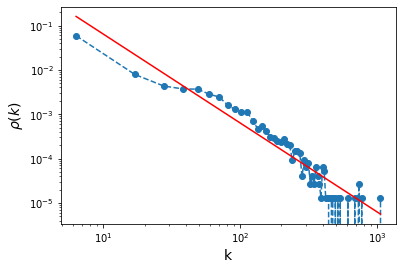

In [ ]:
plt.plot(x_,h,'o--')
plt.plot(x_, np.exp(f(np.log(x_))), color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)

In [ ]:
!pip install powerlaw

In [ ]:
import powerlaw


In [ ]:
fit = powerlaw.Fit(degrees, discrete = True)

Calculating best minimal value for power law fit


In [ ]:
fit.distribution_compare('lognormal', 'truncated_power_law')

(-0.07401706278712616, 0.6153892222039343)

Calculating best minimal value for power law fit


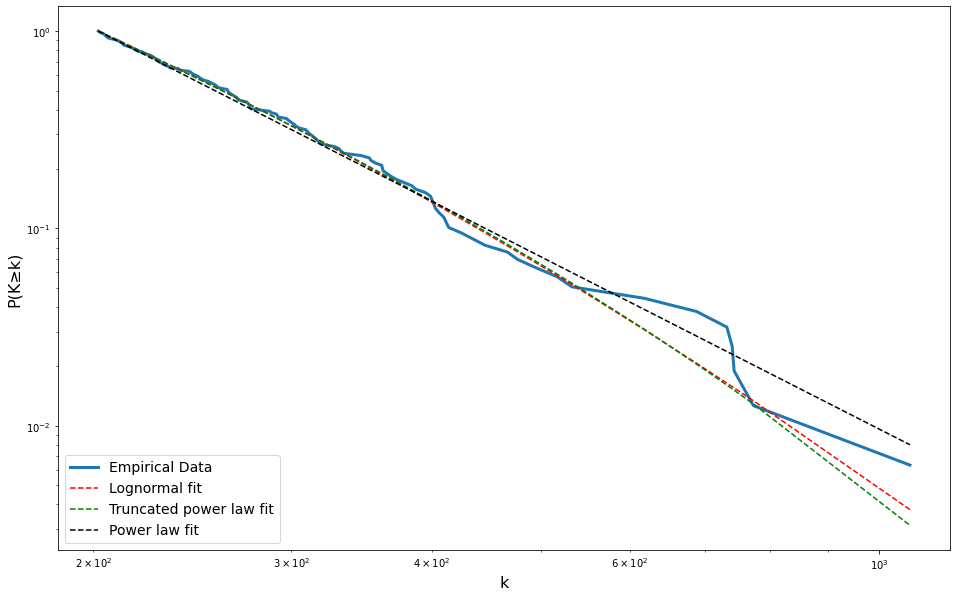

In [ ]:
fig, ax = plt.subplots(figsize = (16,10))

fit = powerlaw.Fit(degrees, discrete=True)
####
fit.distribution_compare('lognormal', 'truncated_power_law')
fit.plot_ccdf(ax=ax, linewidth=3, label='Empirical Data')
fit.lognormal.plot_ccdf(ax=ax, color='r', linestyle='--', label='Lognormal fit')
fit.truncated_power_law.plot_ccdf(ax=ax, color='g', linestyle='--', label='Truncated power law fit')
fit.distribution_compare('power_law', 'lognormal')
fit.power_law.plot_ccdf(ax=ax, color='k', linestyle='--', label='Power law fit')

ax.set_ylabel(u"P(K≥k)",fontsize=16)
ax.set_xlabel("k",fontsize=16)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc=3,fontsize=14)

## **2. Определите коэффициент ассортативности сети.**

Линейный коэффициент корреляции Пирсона двух массивов называется ассортативностью сети. 

In [ ]:
from scipy.stats import pearsonr as corr_coef

In [ ]:
left_degree = [G.degree[P] for (P,Q) in G.edges()]
right_degree = [G.degree[Q] for (P,Q) in G.edges()]

l = left_degree + right_degree # в ненаправленной сети все ребра нужно пройти дважды в "обоих направлениях"
r = right_degree + left_degree

In [ ]:
print(corr_coef(l, r)[0])
# or
print(nx.degree_assortativity_coefficient(G))

# т.е. ассортативность сети практически нулевая

-0.08305248270016223
-0.0830524827001603


### **3. Постройте функцию корреляции степеней. Для этого для каждого значения степени  k  определите среднее значение средней степени ближайших соседей вершин**

In [ ]:
dict_degree = dict(G.degree())


In [ ]:
sorted_dict_degree = sorted(dir_degree.items(), key=lambda x: x[0])
sorted_dict_degree = dict(sorted_dict_degree)

# отсортированный словарь вершина:степень. По возрастанию номера вершины

sorted_dict_degree_values = list(sorted_dict_degree.values())

In [ ]:
nn_degrees = sorted(nx.average_neighbor_degree(G).items(), key=lambda x: x[0])
nn_degrees = dict(nn_degrees)
# отсортированный словарь вершина : среднее значение средней степени ближайших соседей вершин. По возрастанию номера вершины

nn_degrees_values = list(nn_degrees.values())

In [ ]:
dict_combine = dict(zip(sorted_dict_degree_values, nn_degrees_values)) # получаем словарь степень : среднее значение средней степени ближайших соседей вершин
dict_combine = sorted(dict_combine.items(), key=lambda x: x[0]) # сортируем по возрастанию степени

dict_combine = dict(dict_combine)


In [ ]:
deg_combine = list(dict_combine.keys())
nn_deg_combine = list(dict_combine.values())


Text(0, 0.5, 'nn_degrees')

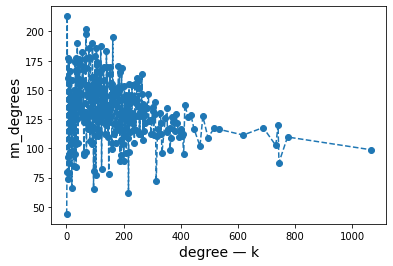

In [ ]:
plt.plot(deg_combine, nn_deg_combine,'o--')
plt.xlabel('degree — k', fontsize=14)
plt.ylabel('nn_degrees', fontsize=14)

### **4. Постройте зависимость коэффициента Rich Club от k.**

Коэффициент определяется:
$$
\phi(k)=\frac{2E_{>k}}{N_{>k}(N_{>k}-1)},
$$

где ${\displaystyle E_{>k}}$ - число ребер между вершинами со степенями больше $k$, $N_{>k}$ - число таких вершин. 

In [ ]:
rich_club = nx.rich_club_coefficient(G, normalized=False, seed=42) # возвращает словать, порог обрезания : значения RK

# обрезаем все узлы со степенью <K, сначала 0. Нет ни одного узла со степенью меньше 0. Потом со степенью 1. То же самое число

In [ ]:
rich_club_k = list(rich_club.keys())
rich_club_rk = list(rich_club.values())

Text(0, 0.5, 'rich_club')

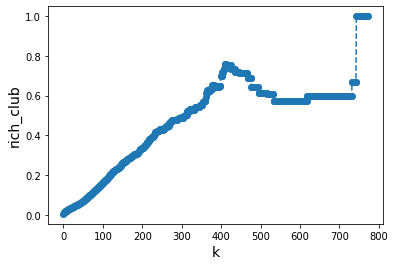

In [ ]:
plt.plot(rich_club_k, rich_club_rk,'o--')
plt.xlabel('k', fontsize=14)
plt.ylabel('rich_club', fontsize=14)

### **5. Напишите функцию разложения сети по core, постройте соответвующее разложение**

###Разложение по k-core

$k$-core -  это максимальный связный подграф графа G, в котором все вершины имеют степень по меньшей мере $k$. 


**k-core — набор всех узлов, у которых степень <= k**

In [ ]:
!pip install gdown

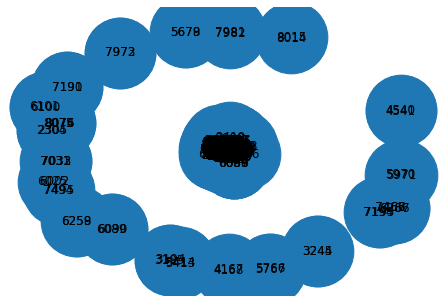

In [ ]:
pos = nx.spring_layout(G, iterations =  100) # использует алгоритм Fruchterman-Reingold для расположения узлов, центр распределен радиально
colors = ['b']*G.number_of_nodes() # цвет вершин
nx.draw(G, pos, node_size = 5000, with_labels = True)
limits = plt.axis('off') 

# pos — координаты каждого узла

Найдем $k$-core для разных значений $k$ и выделим цветом вершины в соответсвующем $k$-core: 

(Будем менять цвета тех узлов, которые попадают в тот или иной core)

In [ ]:
kG = nx.k_core(G, k = 2) # пусть k=2, по умолчанию наибольший k. nx.k_core — подграф
print(kG.nodes())

for node in kG.nodes:
    colors[node-1] = 'g'

nx.draw(G, pos, node_size=500, node_color=colors, with_labels = True)

In [ ]:
kG = nx.k_core(G, k = 3) #для k=3
print(kG.nodes())
for node in kG.nodes:
    colors[node-1] = 'r'

nx.draw(G,pos,node_size=500,node_color=colors,with_labels=True)

Разложение по $k$-core - это поиск всех возможных $k$-core. 

Будем представлять каждое разложение в виде зависимости доли вершин, входящих в соответсвующий $k$-core от значения $k$. 

## **Моделирование и рандомизация**

### **1. Для произвольной (неслучайной) сети подберите параметры моделей Эрдеша-Реньи, Барабаши-Альберта. Постройте соответсвующие случайные сети и определите какая из моделей лучше описывает тут или иную характеристику сети.**

## Модель Эрдеша-Реньи

Самая простоя модель, предложенная авторами в 1959 году. 
$G(N,p)$ -случайная ненаправленная сеть на $N$ вершинах, связь между каждой парой вершин реализуется с вероятностью $p$. 

$G(N,m)$ -случайная ненаправленная сеть на $N$ вершинах, $m$ ребер случайно помещаются среди $N(N-1)/2$ пар.

In [ ]:
er = nx.erdos_renyi_graph(1000, 0.15, seed = 42)

print ('Number of edges =',er.number_of_edges())
degrees=[d for node, d in er.degree()]
print ('Average degree =', np.mean(degrees))

Number of edges = 75071
Average degree = 150.142


In [ ]:
gnm = nx.gnm_random_graph(10000, 300000)

print ('Number of edges =',gnm.number_of_edges())
degrees=[d for node, d in gnm.degree()]
print ('Average degree =',np.mean(degrees))

Number of edges = 300000
Average degree = 60.0


Text(0, 0.5, '$\\rho(k)$')

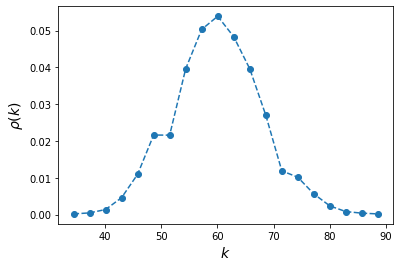

In [ ]:
h,x=np.histogram(degrees,bins=20,density=True) 

x_=(x[:-1]+x[1:])/2
plt.plot(x_,h,'o--')
plt.xlabel(r'$ k$', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)

In [ ]:
list(nx.isolates(gnm))

[]

## Модель Барабаши-Альберт
Модель построена на принципах:

1) роста сети (каждую итерацию добавляется новая вершина с $m$ ребрами;

2) предпочтительном присоединении (вероятность связывания со старой вершиной пропорциональна ее степени). 

Распределение степеней подчиняется степенному закону $P(k)=Ck^{-\gamma}$, $\gamma=3$. 

In [ ]:
ba=nx.barabasi_albert_graph(10000,10)

print ('Number of edges =',ba.number_of_edges())
degrees=[d for node, d in ba.degree()]
print ('Average degree =',np.mean(degrees))


Number of edges = 99900
Average degree = 19.98


Text(0, 0.5, '$\\rho(k)$')

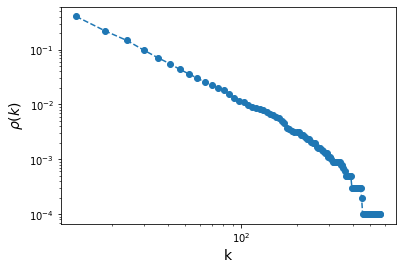

In [ ]:
h,x=np.histogram(degrees,bins=100,density=True) 

x_=(x[:-1]+x[1:])/2 

dx=x_[1]-x_[0]
#plt.plot(x_[:-1],h[:-1],'o--')
ccdf=1-(np.cumsum(h[:-1])*dx)
plt.plot(x_[:-1],ccdf,'o--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)